<h3>Assignment[-1] : The last assignment</h3>
destination : load model and testing images

In [1]:

import socket
hostname = socket.gethostname()  #로컬 환경 이름 가져오기
print(hostname)

DESKTOP-EG29BT8


In [2]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
import numpy as np  #넘파이 임포트

In [3]:
tf.__version__, tf.keras.__version__

('2.3.0', '2.4.0')

In [4]:
from nnutil_20 import imshow
from nnutil_20 import center_crop
from nnutil_20 import random_crop

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
model_fn = 'handpose_224.h5'   #제공된 학습된 파라미터 정보를 기억하는 모델명 정의

In [7]:
model = keras.models.load_model(model_fn)   # 학습된 모델 정의 model

In [8]:

model.summary()  #임포트한 모델 정보 출력

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [9]:
n_classes = model.get_layer('dense_1').output_shape[-1]   # 마지막 층의 형상을 출력
print(n_classes)  # output 형상을 6 => 분류하는 대상이 6개
# 마지막 레이어의 형상이 6인데, 이를 클래스 갯수로 활용
# https://stackoverflow.com/a/49527269

6


<h3>load images for test</h3>

In [10]:

import glob
types = ('*.jpg', '*.JPG', '*.png') # the tuple of file types  #파일 확장자 정의
files_grabbed = []   # 파일 이름 저장할 배열 정의

for fmt in types:  # 파일 이름을 glob모듈을 이용해 가져오면서 확장자 배열을 순회하면서 탐색
    files_grabbed.extend(glob.glob('./dataset_test/'+fmt))  # 배열에 파일 경로 + 확장자 명 추가

In [11]:
idx = 2 #인덱스를 위의 셀 결과를 참고하여 바꾸어 보세요. 
fn_test = files_grabbed[idx]  #임의의 저장된 파일 정보를 담고 있는 배열을 통해 하나 출력
print(fn_test)   # 파일 정보 출력

./dataset_test\20190527_205327.jpg


In [56]:

f=1.0# 약간 변경 가능 예) 1.0 ~1.3 사이
target_size=(int(300//f), int(400//f))  #파일의 픽셀 사이즈를 정의함 f숫자가 커질수록 파일 픽셀 수는 적어짐
print(target_size)

(300, 400)


In [13]:
img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)  # 이미지를 불러오는데 target_size는 위에서 정의된 크기로 불러온다
input_arr = keras.preprocessing.image.img_to_array(img)  # 불러온 이미지를 배열로 변환

input_arr = input_arr/255.0  # 변환된 배열을 255로 나눈 값으로 다시 저장함. 각각의 픽셀 값이 0~255의 값을 가지게 되므로, 255로 나누게 되면 0 ~ 1.0의 값을 가지게 됨
print(input_arr.shape)  # 형상 출력

(300, 400, 3)


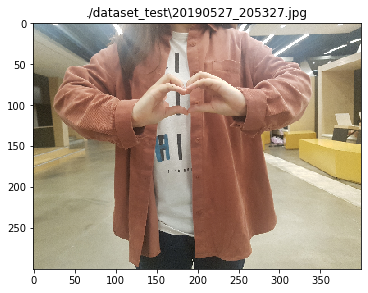

In [14]:
imshow(input_arr, title=fn_test)  # 변환된 이미지 출력

In [15]:
w = 224 # 줄여진 그림을 (w, w) 크기로 crop

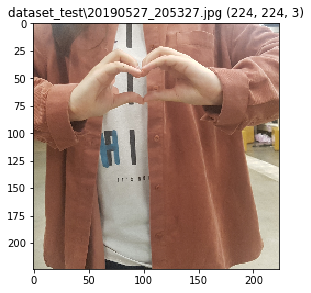

In [16]:

img_square = center_crop(input_arr, crop_size=(w,w))   # 위에 출력된 이미지를 224, 224크기의 정방행렬로 가운데 기준으로 다시 출력함
#img_square = random_crop(input_arr, crop_size=(100,100))
imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))  # crop함수를 이용해 변환한 이미지를 출력함

In [17]:
#input_arr = keras.preprocessing.image.img_to_array(img_square)
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)

(1, 224, 224, 3)


In [18]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, 'dataset_test\\20190527_205327.jpg/ Pred.: #5 --> 25.1950%')

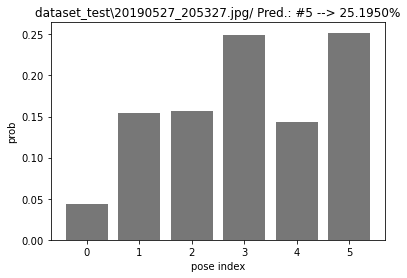

In [19]:

plt.bar(range(n_classes), predictions_array[0], color="#777777")  # 데이터 시각화 패키지 matplotlib bar type  정의
plt.ylabel('prob')   #각각 라벨 이름 정의
plt.xlabel('pose index')   # 라벨 이름 정의
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, max_prob*100.0)) # 그래프 이름 정의 가장 높게 나온 확률이 출력되도록 형식 정의

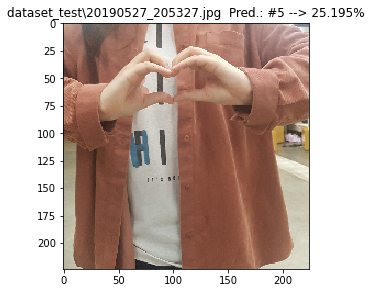

In [20]:
imshow(img_square, title='{}  Pred.: #{} --> {:.3f}%'.format(fn_test.split('/')[-1],  max_idx, max_prob*100.0))    

<h2> TODO </h2>  
* 이미지를 바꾸어가며 테스트를 해보세요. 여러분이 새롭게 사진을 찍고 넣은 뒤 테스트 해보세요. 이미지는 아래 폴더에 넣어두면 됩니다.
    dataset_test  
    
* 주의 1: Dataset 과제로 제출한 사진이 아니어야함.  

* 주의 2: 본 과제에서는 제한된 분량의 사진을 이용하여 비교적 단순한 네트워크를 학습하였습니다.  
    따라서 모든 hand gesture 를 이해할 수 있지는 못합니다. 여러분의 학습 목적을 위해 구성된 코드이므로 가급적 과제에서 찍었던 것과 유사한 구도로 찍어보면 이해에 도움이 될 것입니다.  
* 주의 3 : 리눅스 시스템은 파일명의 대소문자를 구분합니다. 확장자가 jpg 인지, JPG 인지 확인해보세요  
* 아래 두 셀의 내용을 지우고 위의 예처럼 본인의 사진 혹은 본인이 찍은 사진을 올리고 성공적으로 되는 예, 실패하는 예를 각각 구현해주세요. 그리고 실패가 되었다면, 어떤 클래스로 분류가 되었는데, 그 이유는 무엇일지 각각 고찰해주세요.  

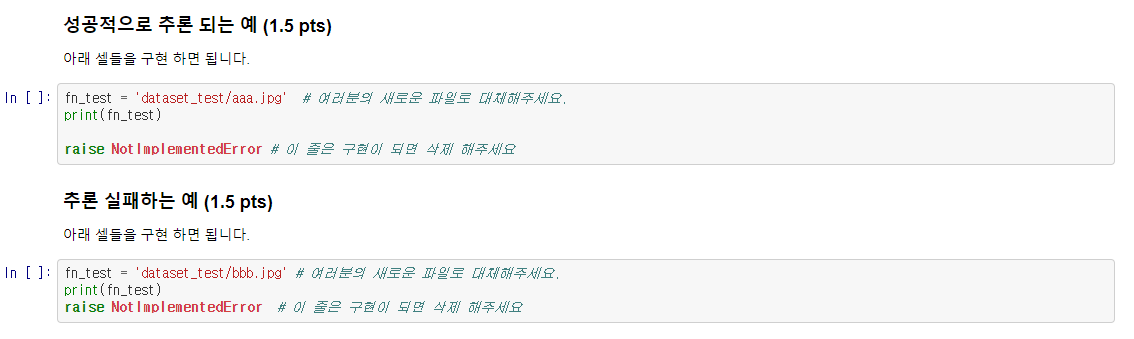

dataset_test/IMG_1795.jpg
(300, 400)
(300, 400, 3)


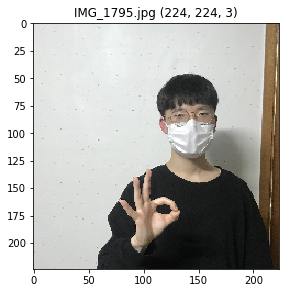

In [21]:
fn_test = 'dataset_test/IMG_1795.jpg'  # 여러분의 새로운 파일로 대체해주세요. (대체 완료)
print(fn_test)   # 파일 경로 출력

f=1.0# 약간 변경 가능 예) 1.0 ~1.3 사이 # 파일 픽셀 정의(원본 300 / 400)
target_size=(int(300//f), int(400//f))  # 위에 저장한 변수를 이용해 파일 크기 조절
print(target_size) # 조절된 파일 크기 출력

img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)  # 케라스의 이미지 전처리 패키지를 통해 파일 이미지 정의
input_arr = keras.preprocessing.image.img_to_array(img)  # 정의된 파일 이미지를 배열로 변환

input_arr = input_arr/255.0  # 배열의 각각의 픽셀 값을 255로 나누어서 0 ~ 1 값으로 변환
print(input_arr.shape)  # 변환된 배열 형상 출력
W = 224  # 파일 크기를 저장할 변수 정의(가로, 세로 모두 w로 정의함)
img_square = center_crop(input_arr, crop_size=(w,w))  #가운데를 기준으로 224크기만큼 찍어서 새로 정의함
#img_square = random_crop(input_arr, crop_size=(100,100))
imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))  # 새로 저장한 이미지의 형상과 그림을 출력




In [22]:
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)  # 배열로 변환한 이미지의 형상을 출력

(1, 224, 224, 3)


In [23]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, 'IMG_1795.jpg/ Pred.: #0 --> 100.0000%')

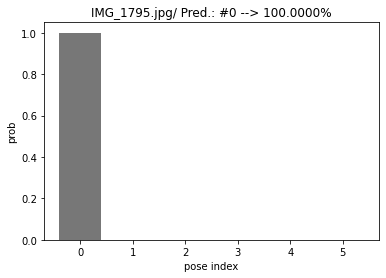

In [24]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, max_prob*100.0))
#밑의 그래프에서 볼 수 있듯이 완벽하게 예측에 성공한 것으로 볼 수 있음.
#=> 뒤의 단조로운 배경과 옷에 뚜렷하게 손모양의 특징을 포착할 수 있었기 떄문에 해당 판단이 가능한 것으로 보인다.

<h2>실패한 예시</h2>

In [43]:

fn_test = 'dataset_test/IMG_1792.JPG' # 여러분의 새로운 파일로 대체해주세요. (대체완료)
print(fn_test)  # 예시에 사용할 파일 경로 정의

dataset_test/IMG_1792.JPG


(300, 400)
(300, 400, 3)


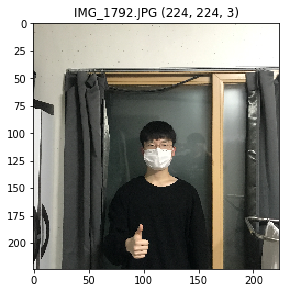

In [50]:
f=1.0# 약간 변경 가능 예) 1.0 ~1.3 사이
target_size=(int(300//f), int(400//f))  # 위와 마찬가지로 파일 사이즈 정의 위와 같은 조건으로 1로 진행하였음
print(target_size)  #정의된 파일 사이즈 출력

img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)  # 케라스의 이미지 전처리 패키지를 통해 이미지를 로드함
input_arr = keras.preprocessing.image.img_to_array(img)  # 로드한 이미지를 마찬가지로 전처리 패키지를 이용해 배열로써 변환

input_arr = input_arr/255.0  # 배열로 변환한 이미지를 255로 나누어 각각 0.0 ~ 1.0으로 변환되도록 함
print(input_arr.shape)  # 배열 형상 출력
W = 224
img_square = center_crop(input_arr, crop_size=(w,w))  # 변환된 배열의 이미지를 위에 정의한 W변수에 값에 따라 가운데를 기준으로 224픽셀만큼을 출력함
#img_square = random_crop(input_arr, crop_size=(100,100))
imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))  #출력한 224 224크기의 그림을 출력

In [51]:
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)

(1, 224, 224, 3)


Text(0.5, 1.0, 'IMG_1792.JPG/ Pred.: #4 --> 74.4684%')

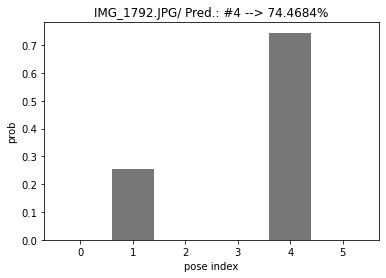

In [52]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, max_prob*100.0))

**실패한 예시**  
* 1번 라벨의 데이터인 이미지를 4번 라벨의 데이터(손가락 하트) 로 인식하는 것을 볼 수 있었다.
* 해당 파일 픽셀을 조금 크게 한 결과 예측을 제대로 수행하는 모습을 볼 수 있었는데, 아마 학습된 모델에 비해 다른 배경을 가진 이미지여서 판단을 잘못 수행하지 않았나 하는 의심이 든다.


**과제 설명**  
* 소스에 대한 설명은 각각의 소스에 주석으로 첨부하였습니다.